# Shor code

In this example, we examine Shor code, the first known quantum error correction code which combine both sign flip and bit flip codes.

The Shor code uses a 9 qubit circuit of 8 ancillary physical qubits and 1 logical qubit, and it works by concatenating each qubit of a phase flip with a bit flip code and hence it can correct both type of errors simultaneously.

The logical qubit begin in the +|1> state, later we introduce errors with the Pauli-X and Pauli-Z gates, the circuit corrects the error returning the qubit to the +|1> state.

In [1]:
!pip install -q qiskit
!pip install -q pylatexenc # After installing, you may need to restart notebook kernel and rerun

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

# For ibmq_qasm_simulator, change the backend to the following
#IBMQ.enable_account('ENTER API KEY HERE')
#provider = IBMQ.get_provider(hub='ibm-q')

backend = Aer.get_backend('aer_simulator')

q = QuantumRegister(9, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)
circuit.x(q[0]) # Initilize the logical qubit to |1>, comment line for |0>.

# Encoding for the phase error
circuit.barrier()
circuit.cx(q[0], q[3])
circuit.cx(q[0], q[6])
circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

# Encoding for the bit error
circuit.cx(q[0], q[1])
circuit.cx(q[3], q[4])
circuit.cx(q[6], q[7])
circuit.cx(q[0], q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[6], q[8])

# Bit flip and phase flip errors
circuit.barrier()
circuit.x(q[0])
circuit.z(q[0])
circuit.barrier()

# Decoding for the bit flip error
circuit.cx(q[0], q[1])
circuit.cx(q[3], q[4])
circuit.cx(q[6], q[7])
circuit.cx(q[0], q[2])
circuit.cx(q[3], q[5])
circuit.cx(q[6], q[8])
circuit.ccx(q[1], q[2], q[0])
circuit.ccx(q[4], q[5], q[3])
circuit.ccx(q[8], q[7], q[6])

# Decoding for the phase flip error
circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])
circuit.cx(q[0], q[3])
circuit.cx(q[0], q[6])
circuit.ccx(q[6], q[3], q[0])
circuit.barrier()

In [3]:
circuit.measure(q[0], c[0]) # Measurement

job = execute(circuit, backend)
job_monitor(job)
counts = job.result().get_counts()

print("\nShor code output")
print(counts)

Job Status: job has successfully run

Shor code output
{'1': 1024}


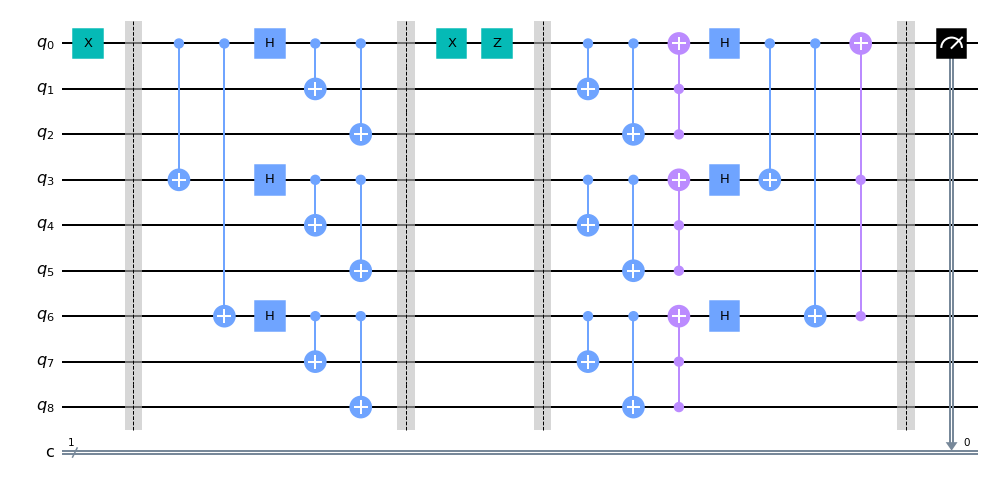

In [4]:
circuit.draw(output='mpl')